<a href="https://colab.research.google.com/github/tkhabia/Leaf_infection_detection/blob/master/leaf_infection_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download Necessary Packages

In [ ]:
%tensorflow_version 2.x

In [ ]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scikit-learn


In [ ]:
ls

sample_data/


In [ ]:
#Donwload the datasets
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/minileaves/v0.1/train-images.npy
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/minileaves/v0.1/train-labels.npy
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/minileaves/v0.1/test-images.npy
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/minileaves/v0.1/all_classes.txt
    

--2020-07-21 16:41:10--  https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/minileaves/v0.1/train-images.npy
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.10, 130.117.252.17, 130.117.252.11, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133527680 (127M) [binary/octet-stream]
Saving to: ‘train-images.npy’

train-images.npy    100%[===================>] 127.34M  9.72MB/s    in 16s     

2020-07-21 16:41:27 (8.05 MB/s) - ‘train-images.npy’ saved [133527680/133527680]

--2020-07-21 16:41:29--  https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/minileaves/v0.1/train-labels.npy
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.12, 130.117.252.17, 130.117.252.11, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.25


## Import packages

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import IPython.display as display
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras import layers
AUTOTUNE = tf.data.experimental.AUTOTUNE



## Load Data

In [ ]:
train_images_path = "train-images.npy" #path where data is stored
train_labels_path = "train-labels.npy"

train_images = np.load(train_images_path)
train_labels = np.load(train_labels_path)

class_names = [x.strip() for x in open("all_classes.txt").readlines()]

In [ ]:
print (train_images.shape)

(43466, 32, 32, 3)


## Visualize the data

corn-maize-healthy
tomato-septoria-leaf-spot
grape-leaf-blight-isariopsis-leaf-spot
tomato-septoria-leaf-spot
tomato-target-spot
grape-leaf-blight-isariopsis-leaf-spot
tomato-early-blight
soybean-healthy
apple-healthy
grape-leaf-blight-isariopsis-leaf-spot
potato-healthy
pepper-bell-healthy
tomato-tomato-yellow-leaf-curl-virus
tomato-septoria-leaf-spot
tomato-septoria-leaf-spot
soybean-healthy
tomato-spider-mites-two-spotted-spider-mite
tomato-septoria-leaf-spot
orange-haunglongbing-citrus-greening
corn-maize-northern-leaf-blight
tomato-tomato-yellow-leaf-curl-virus
orange-haunglongbing-citrus-greening
tomato-healthy
pepper-bell-healthy
potato-late-blight


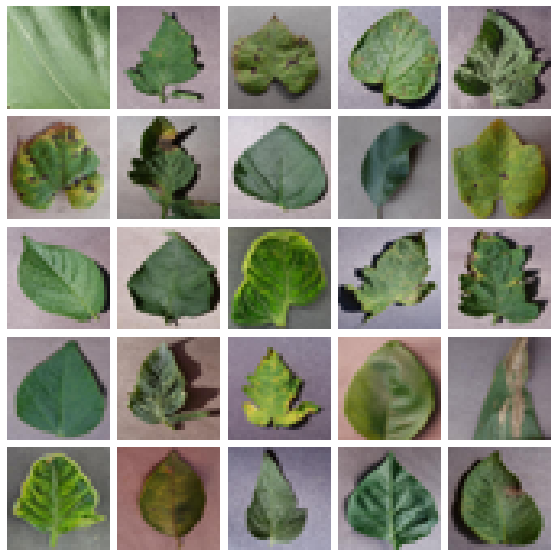

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid

def random_data_sample():
    """
    Returns a random data sample from the training set
    """
    global class_name, train_images, train_labels
    random_index = np.random.randint(0, train_images.shape[0])
    # Render the image
    image_array = train_images[random_index]
    class_label = train_labels[random_index] # an integral number in [0-38)
    class_name = class_names[class_label] # a human readable class name
    return image_array, class_label, class_name

"""
Render a 7x7 grid of 49 randomly sampled images
from the training set
"""
grid_shape = (5, 5)
fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=grid_shape,  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

data_samples = [random_data_sample() for _ in range(grid_shape[0] * grid_shape[1])]
for ax, data_sample in zip(grid, data_samples):
    image_array, class_label, class_name = data_sample
    ax.imshow(image_array)
    ax.axis('off')
    print (class_name)

plt.savefig("image-grid.png")

# Dataset Distribution

In [ ]:
from collections import Counter

data_counter = Counter(train_labels)
unique_class_indices = data_counter.keys()

for _class_index in unique_class_indices:
    print("Class Index : ", _class_index)
    print("Class Name : ", class_names[_class_index])
    print("Number of images in the dataset : ", data_counter[_class_index])
    print("="*100)
# TODO : Add a bar plot of the distribution of the classes here

Class Index :  7
Class Name :  corn-maize-cercospora-leaf-spot-gray-leaf-spot
Number of images in the dataset :  410
Class Index :  4
Class Name :  blueberry-healthy
Number of images in the dataset :  1205
Class Index :  9
Class Name :  corn-maize-healthy
Number of images in the dataset :  925
Class Index :  29
Class Name :  tomato-early-blight
Number of images in the dataset :  806
Class Index :  20
Class Name :  potato-early-blight
Number of images in the dataset :  808
Class Index :  15
Class Name :  orange-haunglongbing-citrus-greening
Number of images in the dataset :  4422
Class Index :  37
Class Name :  tomato-tomato-yellow-leaf-curl-virus
Number of images in the dataset :  4238
Class Index :  5
Class Name :  cherry-including-sour-healthy
Number of images in the dataset :  666
Class Index :  28
Class Name :  tomato-bacterial-spot
Number of images in the dataset :  1738
Class Index :  16
Class Name :  peach-bacterial-spot
Number of images in the dataset :  1864
Class Index :  14


## Tensorflow  attempt

In [ ]:
print(len(unique_class_indices))
no_of_classes = len (unique_class_indices)

38


In [ ]:
print(train_labels[0])

7


In [ ]:
X_train, X_val= train_test_split(train_images, test_size=0.2, random_state=42)
y_train, y_val= train_test_split(train_labels, test_size=0.2, random_state=42) 
## Note : Given that we use the same random state in both the splits, 
## and both `train_images` and `train_labels` have the same number of (aligned) elements, 
## the overall alignment between X_train and the corresponding Y_train will be retained. 

In [ ]:
X_train.shape

(34772, 32, 32, 3)

In [ ]:
BATCH_SIZE = 64
IMG_HEIGHT = 32
IMG_WIDTH = 32

In [ ]:

def prepare_for_training(ds, cache=True, shuffle_buffer_size=16):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  # ds = ds.repeat()

  ds = ds.batch(BATCH_SIZE)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  
  return ds


from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Input

input_tensor = Input(shape=(32, 32, 3))
base_model = tf.keras.applications.ResNet50V2(input_tensor=input_tensor, input_shape=(32,32 ,3 ),include_top=False)
x = base_model.output
for layer in base_model.layers:
    layer.trainable = True

predictions = Dense(no_of_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)


model.summary() 

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_10[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 18, 18, 64)   0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
print(train_images[6954:].shape)
print(train_images[:6954].shape)

(36512, 32, 32, 3)
(6954, 32, 32, 3)


In [ ]:
to_categorical(train_labels[6954:]).shape

(36512, 38)

In [ ]:
from keras.utils import to_categorical

train_ds = tf.data.Dataset.from_tensor_slices((train_images[6954:]/255.0,train_labels[6954:] ))
train_ds = prepare_for_training(train_ds)

test_ds = tf.data.Dataset.from_tensor_slices((train_images[:6954]/255.0,train_labels[:6954]))
test_ds = prepare_for_training(test_ds)

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.RMSprop(),
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy',
           get_f1
           ])
history = model.fit(train_ds, epochs=7,
                    validation_data=test_ds)

Epoch 1/7
217/571 [==========>...................] - ETA: 11s - loss: 1.8775 - accuracy: 0.0644 - get_f1: 679.3358

KeyboardInterrupt: ignored

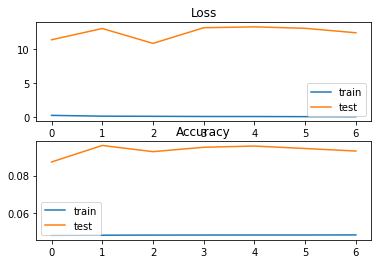

In [ ]:

def make_plots(history):
  plt.subplot(211)
  plt.title('Loss')
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.legend()
  # plot accuracy during training
  plt.subplot(212)
  plt.title('Accuracy')
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.legend()
  plt.show()
make_plots(history)

In [ ]:
y_pred_tf = model.predict(X_val)
y_pred_tf = np.argmax(y_pred_tf, axis=-1)
print(y_pred_tf[0])
print(y_val[0])

[[37]]
9


In [ ]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(32, 32,1024) , max_iter=900)

# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression()

## NOTE : This is definitely not the most optimal approach for this problem. 
## This code is provided to help you get started quickly, and should be treated
## as suck

# Define data pre-processors

In [ ]:

scaler = StandardScaler()
X_train_S =X_train.astype(np.float32)/255.0
X_train_S = X_train_S.reshape(X_train_S.shape[0], 32*32*3)
scaler.fit(X_train_S)

def preprocess_X(X_array , scaler):
    assert X_array.shape[1:] == (32, 32, 3) # as the images are of the dimension 32x32x3
    
    X_array = X_array.astype(np.float32) / 255.0

    X_array = X_array.reshape(X_array.shape[0], 32*32*3)
    X_array = scaler.transform(X_array)
    
    return X_array

X_trainM = preprocess_X(X_train , scaler)
X_valM = preprocess_X(X_val , scaler)

AssertionError: ignored

## Train the classifier

In [ ]:
classifier.fit(X_trainM, y_trainM)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predict on Validation
Now we predict our trained classifier on the validation set and evaluate our model

In [ ]:
y_pred = classifier.predict(X_val)

In [ ]:
def getScore(y_val, y_pred):
  precision = precision_score(y_val,y_pred,average='micro')
  recall = recall_score(y_val,y_pred,average='micro')
  accuracy = accuracy_score(y_val,y_pred)
  f1 = f1_score(y_val,y_pred,average='macro')
  print("Accuracy of the model is :" ,accuracy)
  print("Recall of the model is :" ,recall)
  print("Precision of the model is :" ,precision)
  print("F1 score of the model is :" ,f1)

In [ ]:
getScore(y_val , y_pred_tf)

Accuracy of the model is : 0.00540602714515758
Recall of the model is : 0.00540602714515758
Precision of the model is : 0.00540602714515758
F1 score of the model is : 0.0007981256084198262


In [ ]:
precision = precision_score(y_val,y_pred,average='micro')
recall = recall_score(y_val,y_pred,average='micro')
accuracy = accuracy_score(y_val,y_pred)
f1 = f1_score(y_val,y_pred,average='macro')

In [ ]:
print("Accuracy of the model is :" ,accuracy)
print("Recall of the model is :" ,recall)
print("Precision of the model is :" ,precision)
print("F1 score of the model is :" ,f1)

Accuracy of the model is : 0.7073844030365769
Recall of the model is : 0.7073844030365769
Precision of the model is : 0.7073844030365769
F1 score of the model is : 0.6249088457173627


# Prediction on Evaluation Set

## Load Test Set

In [ ]:
test_file_path = "test-images.npy"
test_images = np.load(test_file_path)

## Predict Test Set
The moment of truth! Predict on test set and then we can make the submission.

In [ ]:
# We first pre-process the test images, the same way we pre-process the train images
test_images = preprocess_X(test_images , scaler)

submission = classifier.predict(test_images)

## Save the prediction to csv

In [ ]:
import pandas as pd
submission = pd.DataFrame(submission)
submission.to_csv('submission.csv',header=['class_index'],index=False)